In [3]:
# Importing all the library  needed for my analysis #
import numpy as np 
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# reading the CSV file from my local Machine #
dataset = pd.read_csv('Wholesale_Customer_Data.csv')

In [5]:
# getting the shape and size of data #
dataset.shape

(440, 7)

In [6]:
# viewing the sataset #
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2


In [7]:
# Viewing the data information #
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
 6   Channel           440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [8]:
# Describbing the dat to see all data information showing
# mean, median, mode , standard deviation, and % 
dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.322727
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.468052
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,2.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,2.000000


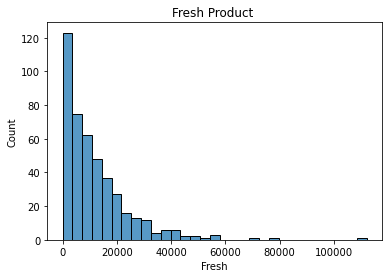

In [9]:
# Plotting a graph of freshproduct against thier count
sns.histplot(dataset.Fresh)
plt.title('Fresh Product ')
plt.show()

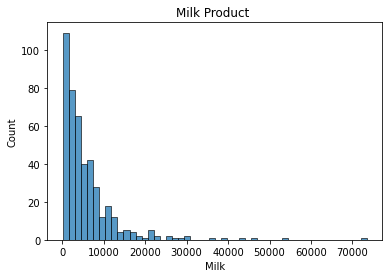

In [10]:
# Plotting a graph of freshproduct against thier count
sns.histplot(dataset.Milk)
plt.title('Milk Product ')
plt.show()

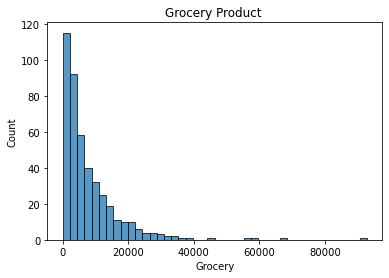

In [11]:
# Plotting a graph of freshproduct against thier count
sns.histplot(dataset.Grocery)
plt.title('Grocery Product ')
plt.show()

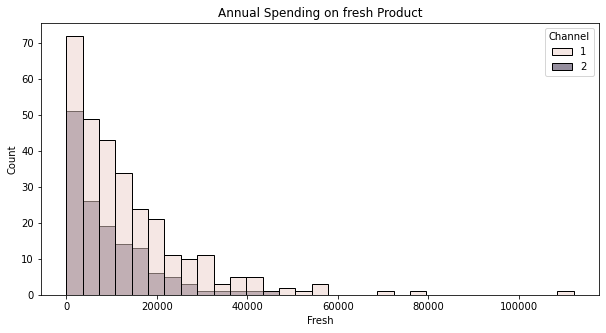

In [12]:
# Plotting the annaul spending on fresh product  to idenfy the channel 
plt.figure(figsize=(10,5))
plt.title("Annual Spending on fresh Product")
sns.histplot(x="Fresh", hue="Channel", data=dataset)
plt.show()

In [13]:
x = dataset.iloc[:,[1,2,3,4,5]].values
y = dataset.iloc[:, 6].values

In [14]:
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2


In [15]:
# splitting the dataset into test and training set 
# test size is 3 just to achive accurate answer 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s,y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test_s)
print(y_pred)

[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 2 2
 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 1 1 2 1
 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 2 2 1 1 1 1 1 1 1
 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 2
 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1]


In [31]:
 print(y_test)

[1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 2 2
 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 1 2 1 1 2 1
 1 1 1 1 1 1 2 1 2 1 2 2 2 1 2 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 2 2
 1 1 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 1 1
 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 2
 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1]


In [32]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print ('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print ('Confussion Matrix:')
print (cm,'\n\n')
print ('-------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print ('Classification Report:\n')
print (result)

accuracy:0.92


Confussion Matrix:
[[144   7]
 [ 11  58]] 


-------------------------------------
Classification Report:

              precision    recall  f1-score   support

           1       0.93      0.95      0.94       151
           2       0.89      0.84      0.87        69

    accuracy                           0.92       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.92      0.92      0.92       220



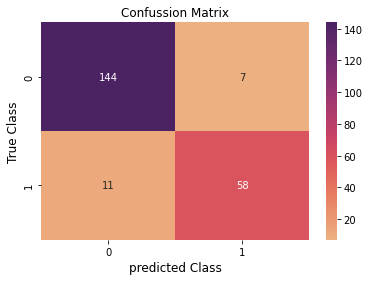

In [33]:
ax = sns.heatmap(cm, cmap='flare', annot = True, fmt = 'd')
plt.xlabel('predicted Class',fontsize=12)
plt.ylabel ('True Class', fontsize=12)
plt.title ('Confussion Matrix', fontsize=12)
plt.show()